### Import

In [1]:
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager
from matplotlib.font_manager import findfont, FontProperties

In [2]:
os.environ['BASE_DIR'] = '/path/to/basedir'

In [3]:
from constants import BASE_DIR, TMCD_DATA_DIR
from helper_utils.helper_methods import list_datasets_and_their_splits

In [4]:
# Set plotting parameters
font = {'family' : 'serif',
        # 'weight' : 'bold',
        'size'   : 11}
mpl.rcParams['figure.dpi'] = 600
mpl.rc('font', **font)
mpl.rc('xtick', labelsize=11) 
plt.rcParams["font.family"] = "Nimbus Roman"
mpl.rc('ytick', labelsize=11) 

In [5]:
# Load all the datasets and splits
dataset_names, splits_mapping = list_datasets_and_their_splits(TMCD_DATA_DIR)

### Plot the training curve

In [6]:
from analysis_utils import load_training_curve_info

In [7]:
# Compute Training Curve Info
dataset_name = 'geoquery'
split = 'standard'
model_name = 't5-base'

steps, ems, best_em = load_training_curve_info(model_name, dataset_name, split)

In [8]:
def plot_training_curve(steps, ems, best_em=-1):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot(steps, ems, label=model_name)
    if best_em != -1:
        ax.plot([steps[0], steps[-1]], [best_em, best_em], label="Best EM")

    ax.set_xlabel('Steps')
    ax.set_ylabel('EM')

#### Plot training curve for all splits

In [10]:
colors = ['#D81B60', '#999999', '#7570B3', '#E66100', '#7570B3', '#E66100']

findfont: Font family ['Nimbus Roman'] not found. Falling back to DejaVu Sans.


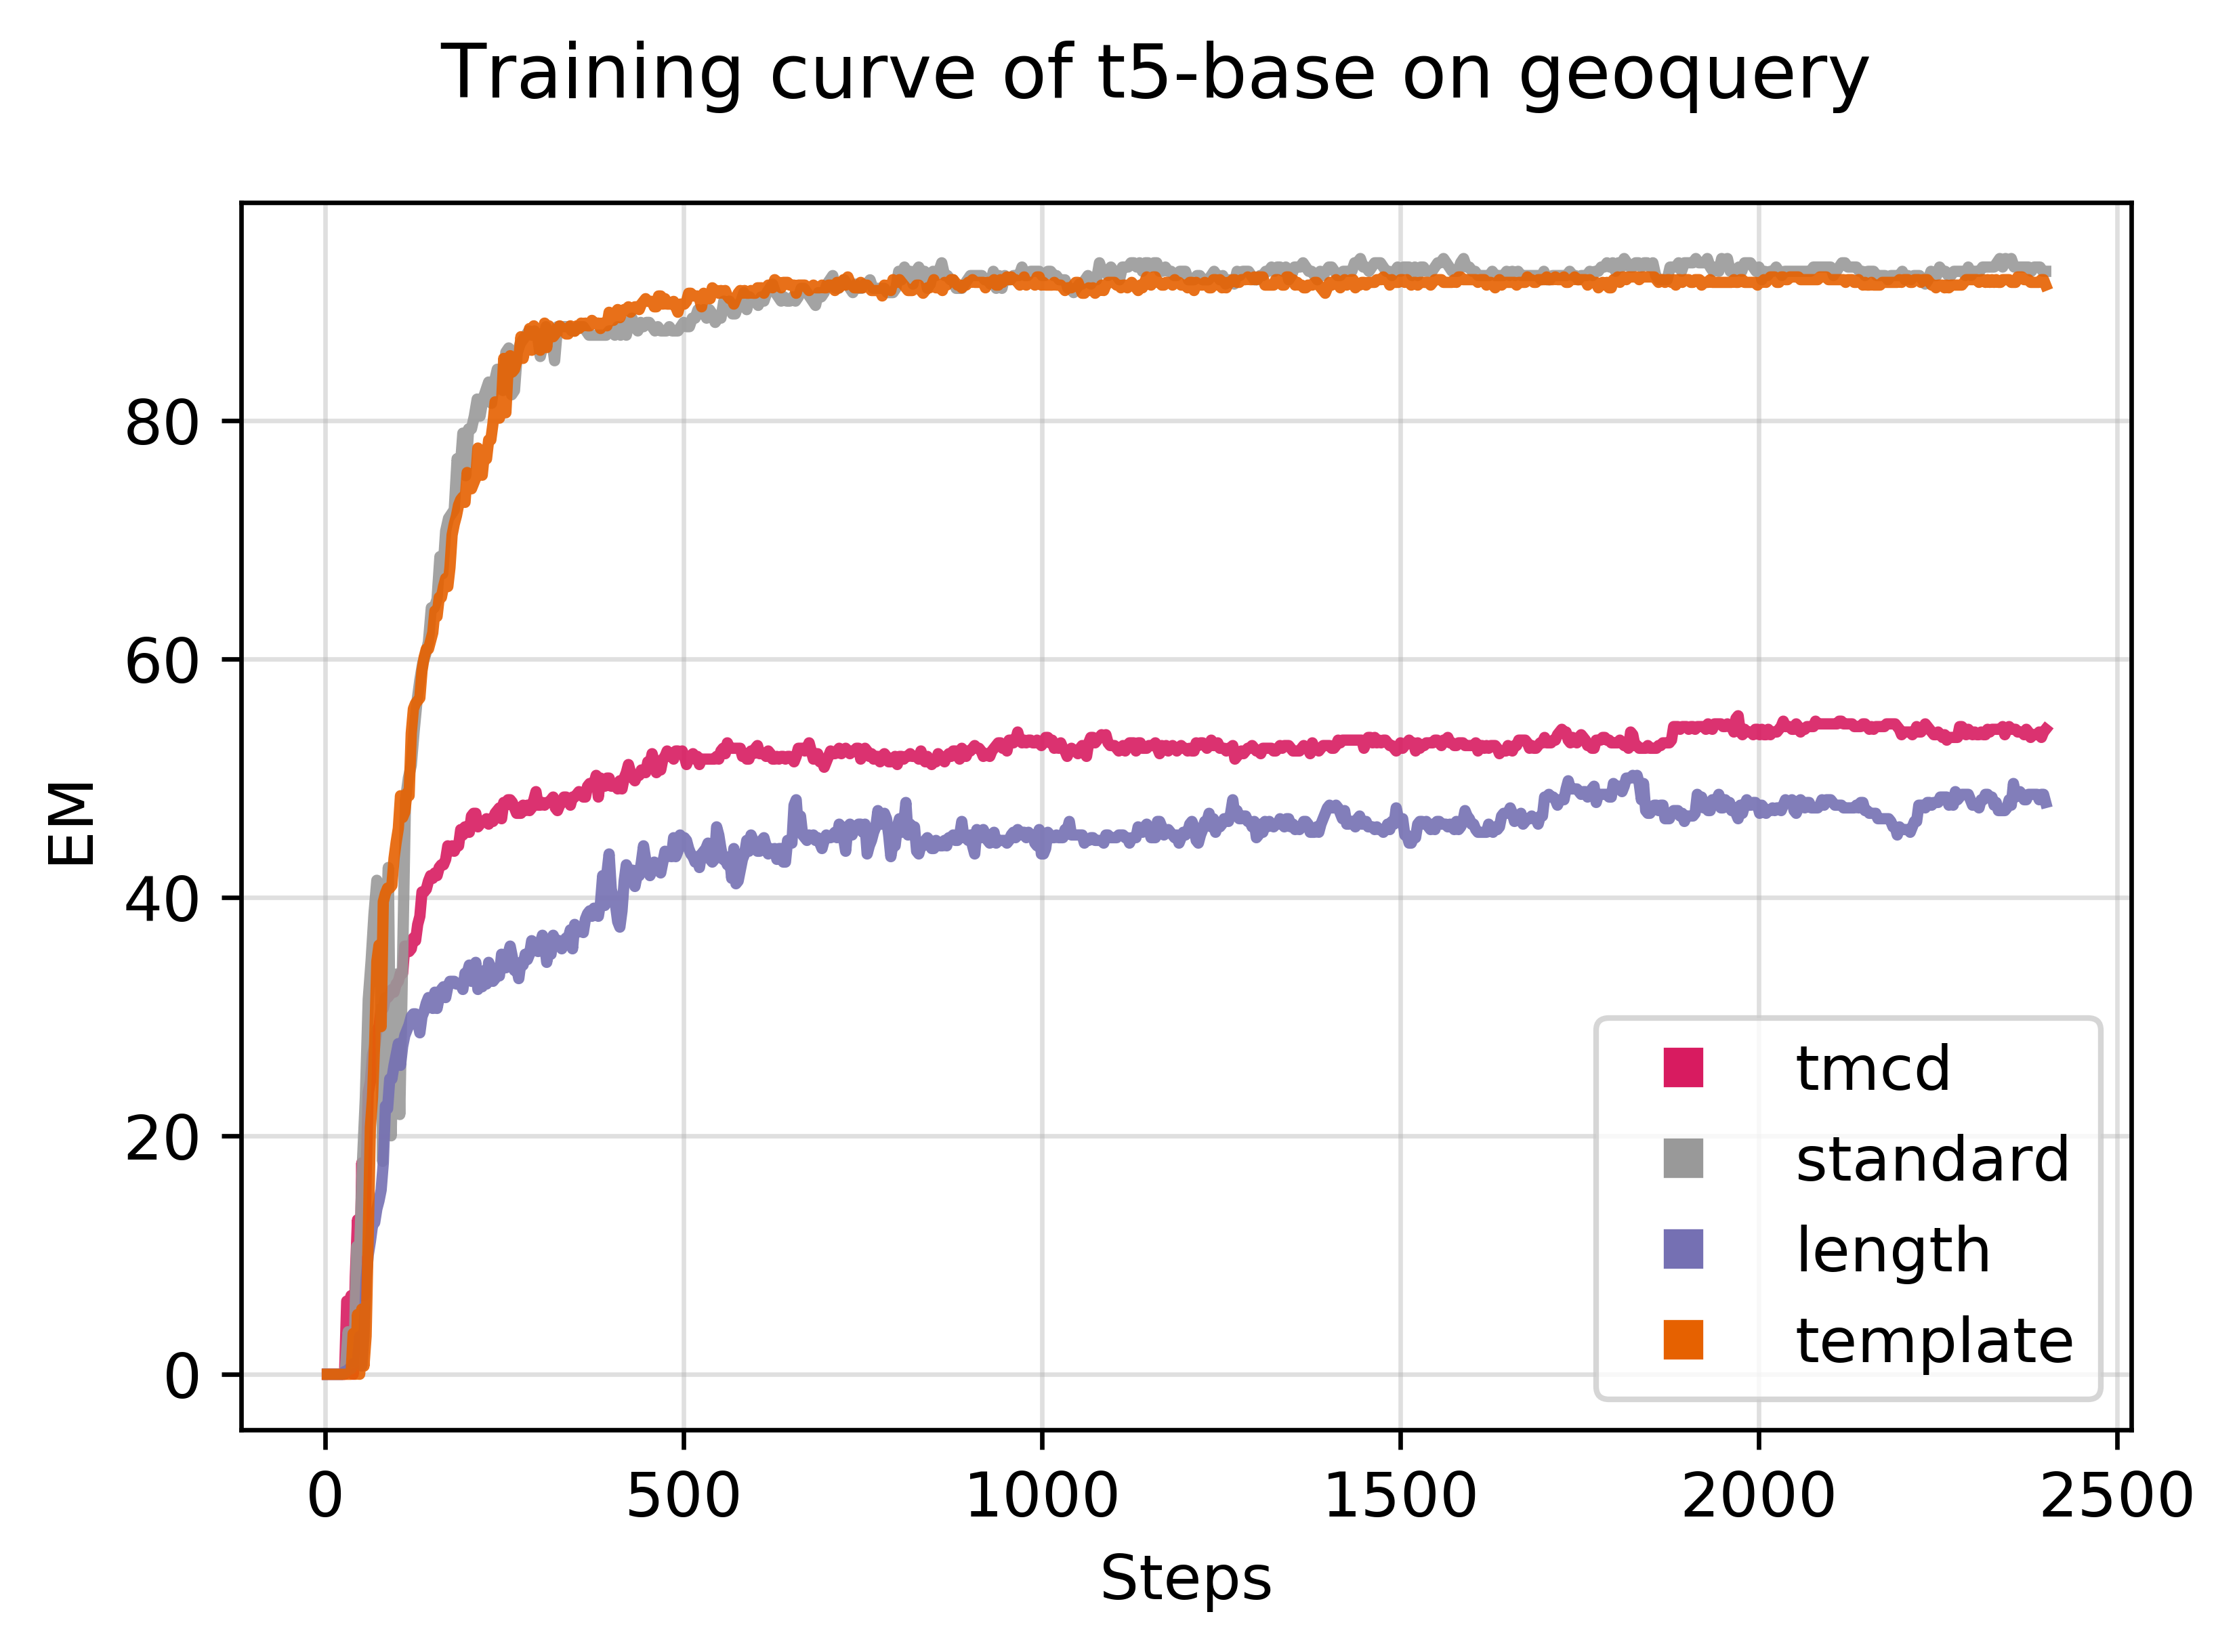

In [12]:
# Plot training curve for all splits
dataset_name = 'geoquery'
fig, ax = plt.subplots(nrows=1, ncols=1)
splits = []
for idx, split in enumerate(splits_mapping[dataset_name]):
    steps, ems, best_em = load_training_curve_info(model_name, dataset_name, split, checkpoint='2400')
    ax.plot(steps, ems, label=split, color=colors[idx], alpha=0.9, linewidth=2.0)
    splits.append(split)
ax.set_xlabel('Steps')
ax.set_ylabel('EM')
ax.grid(alpha=0.4)
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f('s', colors[idx]) for idx in range(len(splits))]
labels = [split for split in splits]
ax.legend(handles, labels)
fig.suptitle("Training curve of " + model_name + " on " + dataset_name)
plt.savefig(f"{BASE_DIR}/results/analysis_res/{model_name}-{dataset_name}.pdf", format='pdf', bbox_inches="tight")
    